# NAME : ANKITA MANDAL


# TASK : PREDICTION USING SUPERVISED ML

In [1]:
# importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn


In [2]:
# read the dataset
df = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
df.shape

(25, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
df.isna().sum()

Hours     0
Scores    0
dtype: int64

In [8]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

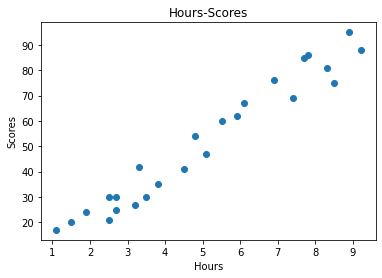

In [9]:
# plotting  the dataset

x = df["Hours"]
y = df["Scores"]
plt.title('Hours-Scores')
plt.scatter(x,y,marker = 'o')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show


# Seperating x and y

In [10]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values

# Spliting the dataset (train_test)

In [11]:
from sklearn.model_selection import train_test_split
train_X,val_X,train_y,val_y = train_test_split(X, y, random_state=0)

In [12]:
train_X.shape

(18, 1)

In [13]:
train_y.shape

(18,)

In [14]:
val_X.shape

(7, 1)

In [15]:
val_y.shape

(7,)

# Modeling

In [16]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()


In [17]:
model.fit(train_X,train_y)

LinearRegression()

In [18]:
pred_y = model.predict(val_X)
prediction = pd.DataFrame({'Hours':[i[0] for i in val_X], 'Predicted Scores':[k for k in pred_y]})
prediction

,Hours,Predicted Scores
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


In [19]:
compare_scores = pd.DataFrame({'Actual Scores': val_y, 'Predicted Scores':pred_y})
compare_scores

,Actual Scores,Predicted Scores
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


# Plotting the Actual vs predicted 

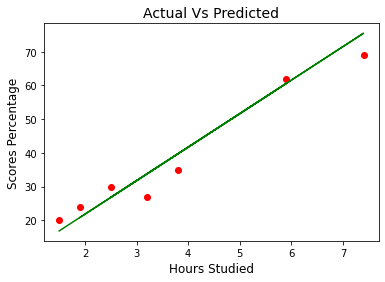

In [20]:
plt.scatter(x=val_X,y=val_y,color='red')
plt.plot(val_X,pred_y,color='Green')
plt.title('Actual Vs Predicted',size=14)

plt.ylabel('Scores Percentage',size=12)
plt.xlabel('Hours Studied',size=12)
plt.show()


# Prediction of  the result

In [21]:
hours = [9.25]
answer = model.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 93.893


### From our model we get the result that -
## if a student studies for 9.25 hrs/day then the score of the student will be 93.893 %

# Evaluating the model

In [22]:
from sklearn.metrics import mean_absolute_error,r2_score

In [23]:
print('Mean Absolute Error: ',mean_absolute_error(val_y,pred_y))

Mean Absolute Error:  4.130879918502486


In [24]:
print('R2 Score is :',r2_score(val_y,pred_y))

R2 Score is : 0.9367661043365055


### We can observe the accuracy of our model , the r2 score is near about the best possible score